In [4]:
%matplotlib inline

# Make summary plot showing foreground separation with CloudClean.jl

See `ngc6822_foreground_separation.iypnb`.

In [1]:
import seaborn as sb

sb.set_context('paper', font_scale=1.2)

In [18]:
from spectral_cube import SpectralCube
from reproject.mosaicking import find_optimal_celestial_wcs

from astropy.wcs.utils import proj_plane_pixel_area

from pathlib import Path

In [3]:
sd_data_path = Path("/reduction/erickoch/LGLBS/hi_feathering/")

In [5]:
gbt_cube = SpectralCube.read(sd_data_path / "NGC6822-center_cube.fits")
gbt_cube = gbt_cube.with_spectral_unit(u.km/u.s, 'radio')

# Add an edge mask to remove the noisiest edge regions

gbt_edge_mask = nd.binary_erosion(np.isfinite(gbt_cube[0].value),
                                  np.ones((3, 3), dtype=bool),
                                  iterations=4)
gbt_cube = gbt_cube.with_mask(gbt_edge_mask)


# Reproject into ICRS 
new_wcs_celestial, new_shape = find_optimal_celestial_wcs(gbt_cube[0].hdu, frame='icrs', projection='SIN')
new_wcs_celestial

new_hdr = new_wcs_celestial.to_header()
new_hdr['WCSAXES'] = 3

new_hdr['NAXIS'] = 3
new_hdr['NAXIS1'] = new_shape[1]
new_hdr['NAXIS2'] = new_shape[0]

# Add the spectral information back
new_hdr['NAXIS3'] = gbt_cube.shape[0]

for this_key in ['CTYPE3', 'CRPIX3', 'CDELT3', 'CUNIT3', 'CRVAL3', 'SPECSYS', 'RESTFRQ', 'MJDREF']:
    new_hdr[this_key] = gbt_cube.header[this_key]
    
new_hdr

gbt_cube_icrs = gbt_cube.reproject(new_hdr).minimal_subcube()

In [6]:
gbt_cube_cloudclean = SpectralCube.read(sd_data_path / "NGC6822-center_cube_ircs_galactic_model_cloudclean.fits")

gbt_cube_ngc6822only = SpectralCube.read(sd_data_path / "NGC6822-center_cube_ircs_no_galactic_component.fits")

/home/erickoch/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/home/erickoch/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/home/erickoch/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


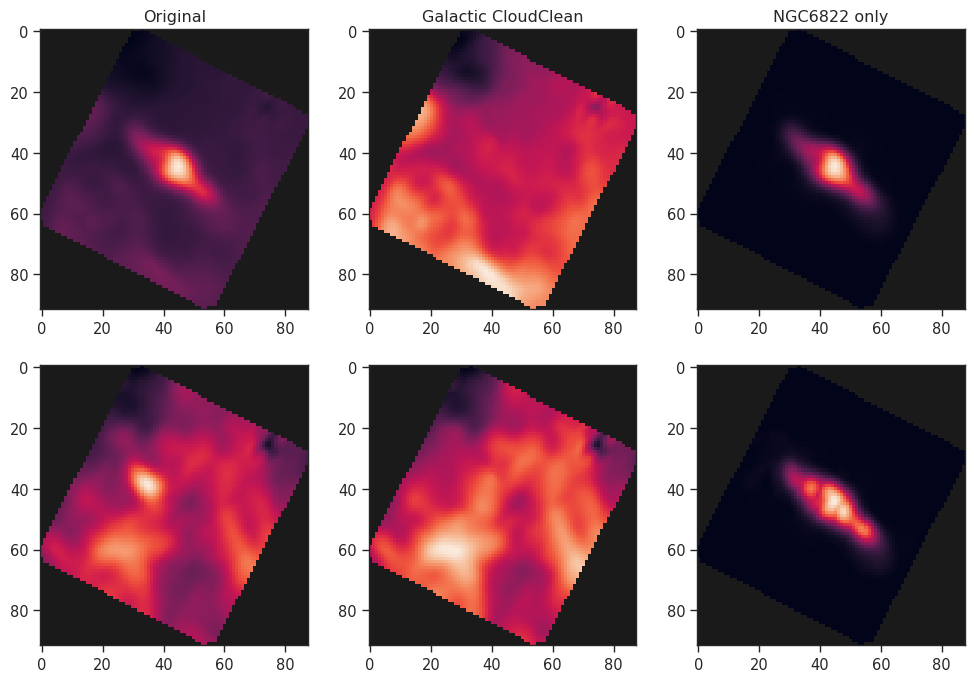

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

_ = [ax.set_facecolor('k') for ax in axs.ravel()]

axs[0, 0].set_title("Original")
axs[0,0].imshow(gbt_cube_icrs.moment0().value)

axs[0, 1].set_title("Galactic CloudClean")
axs[0, 1].imshow(gbt_cube_cloudclean.moment0().value)

axs[0, 2].set_title("NGC6822 only")
axs[0, 2].imshow(gbt_cube_ngc6822only.moment0().value)

axs[1, 0].imshow(gbt_cube_icrs.max(0).value)
axs[1, 1].imshow(gbt_cube_cloudclean.max(0).value)
axs[1, 2].imshow(gbt_cube_ngc6822only.max(0).value)


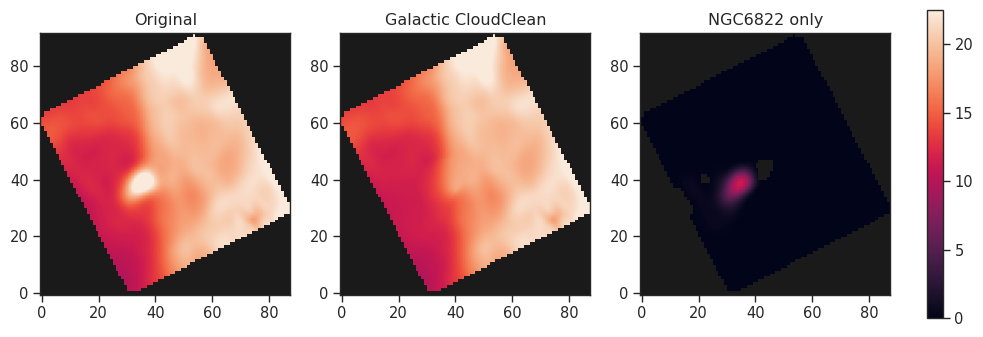

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

_ = [ax.set_facecolor('k') for ax in axs.ravel()]

this_chan_idx = gbt_cube_icrs.closest_spectral_channel(0*u.km/u.s)

vmin = 0
# vmax = np.nanmax(gbt_cube_icrs[this_chan_idx].value)
vmax = np.nanpercentile(gbt_cube_icrs[this_chan_idx].value, 95)
# vmax = np.nanmax(gbt_cube_ngc6822only[this_chan_idx].value)

norm = plt.Normalize(vmin=vmin, vmax=vmax)

axs[0].set_title("Original")
im1 = axs[0].imshow(gbt_cube_icrs[this_chan_idx].value, norm=norm, origin='lower')

axs[1].set_title("Galactic CloudClean")
axs[1].imshow(gbt_cube_cloudclean[this_chan_idx].value, norm=norm, origin='lower')

axs[2].set_title("NGC6822 only")
axs[2].imshow(gbt_cube_ngc6822only[this_chan_idx].value, norm=norm, origin='lower')


cbar = fig.colorbar(im1, ax=axs.ravel(), orientation='vertical', fraction=0.046, pad=0.04)

/home/erickoch/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/home/erickoch/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/home/erickoch/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/home/erickoch/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


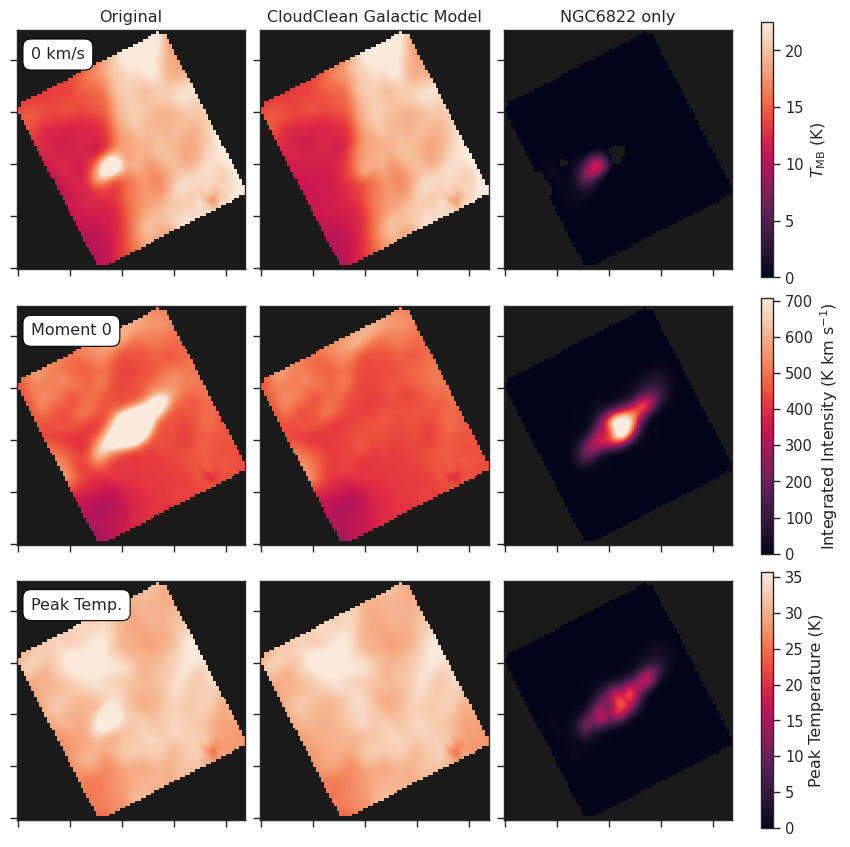

In [70]:
fig, axs = plt.subplots(3, 3,
                        figsize=(8.4, 8.4),
                       layout='constrained')

_ = [ax.set_facecolor('k') for ax in axs.ravel()]

for ax in axs.ravel():
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Channel 0 km/s
this_chan_idx = gbt_cube_icrs.closest_spectral_channel(0*u.km/u.s)

vmin = 0
vmax = np.nanpercentile(gbt_cube_icrs[this_chan_idx].value, 95)

norm = plt.Normalize(vmin=vmin, vmax=vmax)

axs[0, 0].set_title("Original")

axs[0, 0].text(5, 85, "0 km/s",
               ha='left', va='top',
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

im1 = axs[0, 0].imshow(gbt_cube_icrs[this_chan_idx].value, norm=norm, origin='lower')

axs[0, 1].set_title("CloudClean Galactic Model")
axs[0, 1].imshow(gbt_cube_cloudclean[this_chan_idx].value, norm=norm, origin='lower')

axs[0, 2].set_title("NGC6822 only")
axs[0, 2].imshow(gbt_cube_ngc6822only[this_chan_idx].value, norm=norm, origin='lower')


cbar = fig.colorbar(im1, ax=axs[0].ravel(), orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label(r"$T_{\rm MB}$ (K)")

# Moment 0
vmin = 0
vmax = np.nanpercentile(gbt_cube_icrs.moment0().value, 95)

norm = plt.Normalize(vmin=vmin, vmax=vmax)

im2 = axs[1, 0].imshow(gbt_cube_icrs.moment0().value, norm=norm, origin='lower')

axs[1, 0].text(5, 85, "Moment 0",
               ha='left', va='top',
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

axs[1, 1].imshow(gbt_cube_cloudclean.moment0().value, norm=norm, origin='lower')
axs[1, 2].imshow(gbt_cube_ngc6822only.moment0().value, norm=norm, origin='lower')

cbar = fig.colorbar(im2, ax=axs[1].ravel(), orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label(r"Integrated Intensity (K km s$^{-1}$)")


# Peak temperature
vmin = 0
vmax = np.nanpercentile(gbt_cube_icrs.max(0).value, 95)

norm = plt.Normalize(vmin=vmin, vmax=vmax)

im3 = axs[2, 0].imshow(gbt_cube_icrs.max(0).value, norm=norm, origin='lower')

axs[2, 0].text(5, 85, "Peak Temp.",
               ha='left', va='top',
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

axs[2, 1].imshow(gbt_cube_cloudclean.max(0).value, norm=norm, origin='lower')
axs[2, 2].imshow(gbt_cube_ngc6822only.max(0).value, norm=norm, origin='lower')

cbar = fig.colorbar(im3, ax=axs[2].ravel(), orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label(r"Peak Temperature (K)")

plt.savefig("../figures/ngc6822_cloudclean_summary.pdf", bbox_inches='tight')


### Total HI mass of NGC6822 from our model

In [8]:
mom0 = gbt_cube_ngc6822only.moment0()

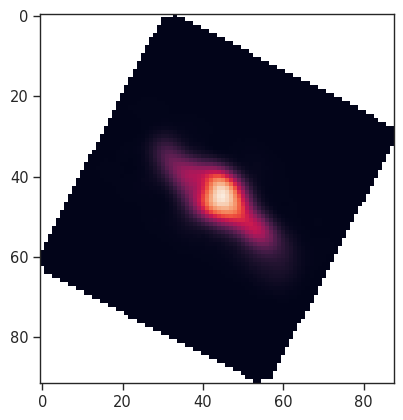

In [9]:
mom0.quicklook()

In [10]:
mom0.unit

Unit("K km / s")

In [26]:
alpha_atom = 0.0196 * (u.M_sun / u.pc ** 2) / (u.K * u.km / u.s)

alpha_HI = ((1.82e18 * u.cm**-2) * c.m_p).to(u.solMass / u.pc**2) / (u.K * u.km / u.s)

# Load in galaxy parames
%run ../c+d_dwarf_analysis/hi_dwarf_galaxy_params.py

gal_ngc6822.distance = 520 * u.kpc

In [28]:
total_intint = np.nansum(mom0)

print(total_intint)
# total_intint_err = np.nansum(emom0_dict[this_gal])

# print(mom0_dict[this_gal].beam.major.to(u.arcsec),
#       (np.sqrt(proj_plane_pixel_area(mom0_dict[this_gal].wcs.celestial)) * u.deg).to(u.arcsec))

pixarea = (proj_plane_pixel_area(mom0.wcs.celestial)) * u.deg**2
physarea = pixarea.to(u.sr).value * gal_ngc6822.distance.to(u.pc)**2

pixperbeam = (mom0.beam.sr / pixarea).to(u.one)

# print(pixarea, physarea, pixperbeam)

# to surfdens
atomic_gas_mass = alpha_HI * total_intint * physarea
# atomic_gas_mass_err = alpha_HI * total_intint_err * physarea / np.sqrt(pixperbeam)

print(np.log10(atomic_gas_mass.value),)# np.log10(atomic_gas_mass_err.value))
print(atomic_gas_mass,)# atomic_gas_mass_err)

168154.70201880063 K km / s
8.234908387835505
171754604.15278542 solMass


In [31]:
# Single dish measurement from de Blok & Walter 2006
# https://ui.adsabs.harvard.edu/abs/2006AJ....131..343D/abstract
mhi_dB06 = 1.34e8 * u.solMass * (520 / 490)**2 # distance correction for 520 kpc


mhi_dB06

<Quantity 1.50910454e+08 solMass>

In [32]:
100 * (atomic_gas_mass - mhi_dB06) / mhi_dB06

<Projection 13.81226391>